In [1]:
from ase.io import read

atoms=read('optimized.vasp',format='vasp')

In [2]:
import numpy as np
natom=len(atoms.positions)
nmodes=natom*3
dyn_file='Dyn.form'
lammps_dyn=np.loadtxt(dyn_file).reshape((nmodes,nmodes))

In [3]:
eigenvalue, eigenvector=np.linalg.eigh(lammps_dyn)

In [4]:
def broadening(omega1, omega2, sigma):
    delta=1.0/np.pi*sigma/((omega1-omega2)**2+sigma*sigma)
    return delta

In [5]:
omega_min=5.0
omega_max=100.0
nom=100
nwn=20
om=np.linspace(omega_min,omega_max,nom)
Gmin=0.02
Gmax=10*Gmin
wn=np.linspace(Gmin,Gmax,nwn)

dsf_L=np.zeros([nwn,nom])
EL=np.zeros([nwn,nmodes])

In [6]:
wn

array([0.02      , 0.02947368, 0.03894737, 0.04842105, 0.05789474,
       0.06736842, 0.07684211, 0.08631579, 0.09578947, 0.10526316,
       0.11473684, 0.12421053, 0.13368421, 0.14315789, 0.15263158,
       0.16210526, 0.17157895, 0.18105263, 0.19052632, 0.2       ])

In [7]:
import pyAF.constants
pc=pyAF.constants.physical_constants()
omega=[]
#extract minimum index of negative frequency
mode_negative=0
for i in range(nmodes):
    if eigenvalue[i] <0.0:
        val=-np.sqrt(-eigenvalue[i])*pc.scale_cm
        omega.append(val)
        mode_negative=i
    else:
        val=np.sqrt(eigenvalue[i])*pc.scale_cm
        omega.append(val)

In [81]:
#test for single mode eigenvector
ind=10
partial=eigenvector[:,ind]
print(partial)
EL=np.zeros([nwn,nmodes])
for ik in range(nwn):
    k=np.array([wn[ik],0,0])
    for j in range(natom):
        nstart=3*j
        nend=3*(j+1)
        disp=partial[nstart:nend]
        print(disp)
        pos=atoms.positions[j]
        print(pos)
        phase=np.exp(1.0j*np.dot(k,pos))
        polarlization=np.dot(k,disp)
        factor=phase*polarlization
        print(factor)
        EL[ik,ind]=EL[ik,ind]+np.abs(factor)**2/3

[-0.00855852 -0.06308095  0.00563376 ...  0.00027849  0.03054212
  0.02359806]
[-0.00855852 -0.06308095  0.00563376]
[ 9.86360424 12.89807866 19.67578827]
(-0.00016785045297382497-3.35485367526962e-05j)
[-0.01912032  0.02270325 -0.01637291]
[21.61085619  1.60831892  0.35562206]
(-0.0003472400854054453-0.0001601843577254187j)
[-0.03124519  0.01111414 -0.01535598]
[1.98179697 4.59023197 1.80571005]
(-0.00062441294501461-2.4762162189905364e-05j)
[ 0.00319147 -0.02135399 -0.0257134 ]
[ 5.68080957 20.09674521  2.27513989]
(6.341780509254742e-05+7.236453906173337e-06j)
[ 0.00137679  0.00393855 -0.02539903]
[5.23380875 0.72090483 8.26162599]
(2.7385021505950733e-05+2.877075122842363e-06j)
[ 0.01433045 -0.0333339  -0.02166386]
[10.52315564  0.75957081 10.70274223]
(0.00028028484773677797+5.9876311416708034e-05j)
[0.0316941  0.02787885 0.03711388]
[16.50046928 13.63304222  8.32163138]
(0.0005996773280946285+0.0002054106859988685j)
[-0.01828212 -0.06161119  0.00095124]
[ 9.46563969 10.55937562 1

In [82]:
EL[:,ind]

array([1.83480296e-05, 3.98472443e-05, 6.95802008e-05, 1.07546899e-04,
       1.53747339e-04, 2.08181521e-04, 2.70849445e-04, 3.41751111e-04,
       4.20886518e-04, 5.08255667e-04, 6.03858558e-04, 7.07695191e-04,
       8.19765566e-04, 9.40069682e-04, 1.06860754e-03, 1.20537914e-03,
       1.35038448e-03, 1.50362357e-03, 1.66509639e-03, 1.83480296e-03])

In [83]:
omega[ind]

56.82848751736935

In [85]:
b=[]
for iw in range(nom):
    b.append(broadening(om[iw],omega[ind],sigma))

In [86]:
b

[5.9243764086885284e-05,
 6.14997890950932e-05,
 6.38871721817361e-05,
 6.641631232591888e-05,
 6.909865825536719e-05,
 7.194683822022669e-05,
 7.497480887611765e-05,
 7.819802656110837e-05,
 8.163364490033349e-05,
 8.530074346674131e-05,
 8.922059320370479e-05,
 9.341696552214542e-05,
 9.791649348219307e-05,
 0.00010274909533601893,
 0.00010794847304700753,
 0.00011355270134551048,
 0.00011960492661068449,
 0.00012615419961729677,
 0.0001332564722714284,
 0.00014097579630480153,
 0.00014938577208104952,
 0.0001585713089782858,
 0.00016863077634059822,
 0.00017967864725413062,
 0.00019184876853447773,
 0.00020529843234028111,
 0.00022021348210023213,
 0.0002368147642666978,
 0.0002553663470579526,
 0.0002761860816156868,
 0.0002996593006951737,
 0.0003262567669862282,
 0.0003565584470048764,
 0.0003912853756493415,
 0.00043134291745908215,
 0.0004778803314103308,
 0.0005323740565692034,
 0.0005967461586393875,
 0.0006735359778571923,
 0.0007661541365550135,
 0.0008792673475177514,
 0.0

In [87]:
dsf_L=np.zeros([nwn,nom])
sigma=0.5
for iw in range(nom):
    for ik in range(nwn):
        dsf_L[ik,iw]=dsf_L[ik,iw]+EL[ik,ind]*broadening(om[iw],omega[ind],sigma)

In [88]:
dsf_L[0,:]

array([1.08700634e-09, 1.12839995e-09, 1.17220373e-09, 1.21860846e-09,
       1.26782423e-09, 1.32008272e-09, 1.37564001e-09, 1.43477971e-09,
       1.49781653e-09, 1.56510056e-09, 1.63702208e-09, 1.71401725e-09,
       1.79657472e-09, 1.88524344e-09, 1.98064178e-09, 2.08346832e-09,
       2.19451473e-09, 2.31468099e-09, 2.44499370e-09, 2.58662808e-09,
       2.74093457e-09, 2.90947107e-09, 3.09404247e-09, 3.29674914e-09,
       3.52004688e-09, 3.76682171e-09, 4.04048349e-09, 4.34508430e-09,
       4.68546929e-09, 5.06747040e-09, 5.49815772e-09, 5.98616881e-09,
       6.54214494e-09, 7.17931565e-09, 7.91429261e-09, 8.76816246e-09,
       9.76801494e-09, 1.09491162e-08, 1.23580581e-08, 1.40574188e-08,
       1.61328233e-08, 1.87039267e-08, 2.19420225e-08, 2.60992657e-08,
       3.15591603e-08, 3.89279992e-08, 4.92100711e-08, 6.41671463e-08,
       8.71215417e-08, 1.24956286e-07, 1.93871989e-07, 3.39679723e-07,
       7.35013397e-07, 2.45247079e-06, 1.16757582e-05, 2.53674546e-06,
      

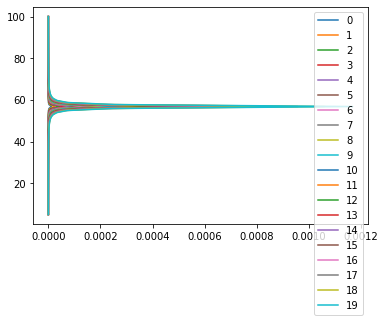

In [89]:
import matplotlib.pyplot as plt 
for ik in range(nwn):
    plt.plot(dsf_L[ik,:],om,label=str(ik))
plt.legend()

In [61]:
#test for single mode eigenvector
ind=3
partial=eigenvector[:,ind]
print(partial)
EL=np.zeros([nwn,nmodes])
for ik in range(nwn):
    k=np.array([wn[ik],0,0])
    for j in range(natom):
        nstart=3*j
        nend=3*(j+1)
        disp=partial[nstart:nend]
        pos=atoms.positions[j]
        phase=np.exp(1.0j*np.dot(k,pos))
        polarlization=np.dot(k,disp)
        factor=phase*polarlization
        EL[ik,ind]=EL[ik,ind]+np.abs(factor)**2/3

[ 0.00834461 -0.02960095 -0.01383089 ...  0.00113445 -0.00668173
 -0.0060268 ]


In [62]:
dsf_L=np.zeros([nwn,nom])
sigma=0.5
for iw in range(nom):
    for ik in range(nwn):
        dsf_L[ik,iw]=dsf_L[ik,iw]+EL[ik,ind]*broadening(om[iw],omega[ind],sigma)

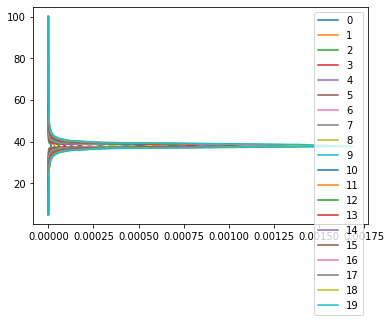

In [63]:
import matplotlib.pyplot as plt 
for ik in range(nwn):
    plt.plot(dsf_L[ik,:],om,label=str(ik))
plt.legend()

In [103]:
#[100] direction
dsf_L=np.zeros([nwn,nom])
EL=np.zeros([nwn,nmodes])

for ind, vec in enumerate(eigenvector.T):
    for ik in range(nwn):
        k=np.array([wn[ik],0,0])
        contrib=0.0
        for j in range(natom):
            nstart=3*j
            nend=3*(j+1)
            disp=vec[nstart:nend]
            pos=atoms.positions[j]
            phase=np.exp(1.0j*np.dot(k,pos))
            polarlization=np.dot(k,disp)
            factor=phase*polarlization
            contrib=contrib+factor

        EL[ik,ind]=EL[ik,ind]+np.abs(contrib)**2/3


In [104]:
EL[0,:]

array([3.68021134e-02, 1.40740823e-03, 2.89577202e-02, ...,
       1.19918257e-09, 3.28736466e-09, 1.40985325e-10])

In [105]:
EL[10,:]

array([6.99194587e-01, 2.67390139e-02, 5.50160829e-01, ...,
       2.03194642e-05, 7.54365856e-06, 1.52445107e-07])

In [108]:
sigma=0.5
for iw in range(nom):
    for ik in range(nwn):
        for ind in range(nmodes):
            dsf_L[ik,iw]=dsf_L[ik,iw]+EL[ik,ind]*broadening(om[iw],omega[ind],sigma)

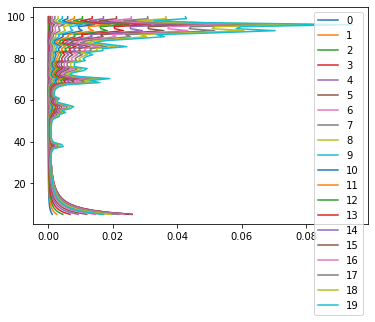

In [109]:
for ik in range(nwn):
    plt.plot(dsf_L[ik,:],om,label=str(ik))
plt.legend()